<a href="https://colab.research.google.com/github/devansh391k/COVID-19-ANALYSIS-DATA-SCIENCE-PROJECT-/blob/main/COVID19_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET AND ANALYSIS**

In [3]:
import pandas as pd
import numpy as np

# Load and parse dates
df = pd.read_csv("DATA COVID 19.csv", parse_dates=['date'])

# Drop columns with >95% missing
missing_percent = df.isnull().mean()
df_cleaned = df.drop(columns=missing_percent[missing_percent > 0.95].index)

# Fill missing numeric values with forward fill
df_cleaned = df_cleaned.fillna(method='ffill')

# Drop rows with remaining NaNs
df_cleaned = df_cleaned.dropna()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16053 entries, 0 to 16052
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   country                                     16053 non-null  object        
 1   date                                        16053 non-null  datetime64[ns]
 2   total_cases                                 16053 non-null  float64       
 3   new_cases                                   16053 non-null  float64       
 4   new_cases_smoothed                          16053 non-null  float64       
 5   total_cases_per_million                     16053 non-null  float64       
 6   new_cases_per_million                       16053 non-null  float64       
 7   new_cases_smoothed_per_million              16053 non-null  float64       
 8   total_deaths                                16053 non-null  float64       
 9   new_de

/tmp/ipython-input-3876239837.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


In [4]:
import matplotlib.pyplot as plt

# Univariate statistics for 'total_cases'
univariate_stats = df_cleaned['total_cases'].describe()
skewness = df_cleaned['total_cases'].skew()
kurtosis = df_cleaned['total_cases'].kurt()

# Print stats in console (optional)
print("Univariate Statistics for 'total_cases':")
print(univariate_stats)
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Univariate Statistics for 'total_cases':
count    1.605300e+04
mean     1.755698e+06
std      3.098301e+06
min      0.000000e+00
25%      3.912700e+04
50%      6.331740e+05
75%      1.542683e+06
max      1.186116e+07
Name: total_cases, dtype: float64

Skewness: 2.28
Kurtosis: 4.15


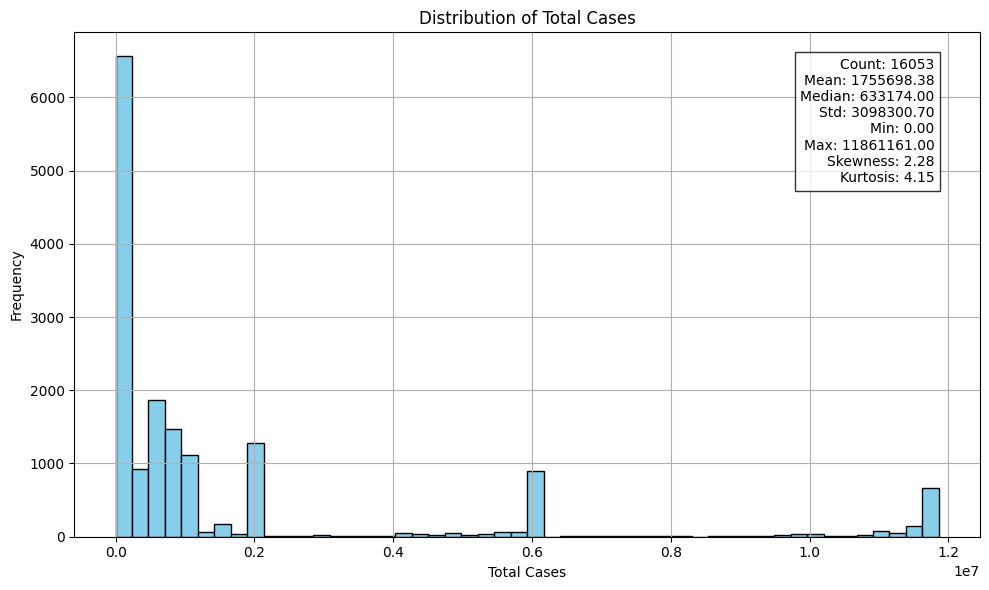

In [5]:
# Plot Histogram with text box showing stats
plt.figure(figsize=(10, 6))
df_cleaned['total_cases'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

# Stats box text
stats_text = (
    f"Count: {univariate_stats['count']:.0f}\n"
    f"Mean: {univariate_stats['mean']:.2f}\n"
    f"Median: {df_cleaned['total_cases'].median():.2f}\n"
    f"Std: {univariate_stats['std']:.2f}\n"
    f"Min: {univariate_stats['min']:.2f}\n"
    f"Max: {univariate_stats['max']:.2f}\n"
    f"Skewness: {skewness:.2f}\n"
    f"Kurtosis: {kurtosis:.2f}"
)

# Place stats on the plot
plt.gca().text(
    0.95, 0.95, stats_text,
    transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

#**BIVARIATE ANALYSIS**


# **Scatter Plot: Total Cases vs Total Deaths with Correlation**

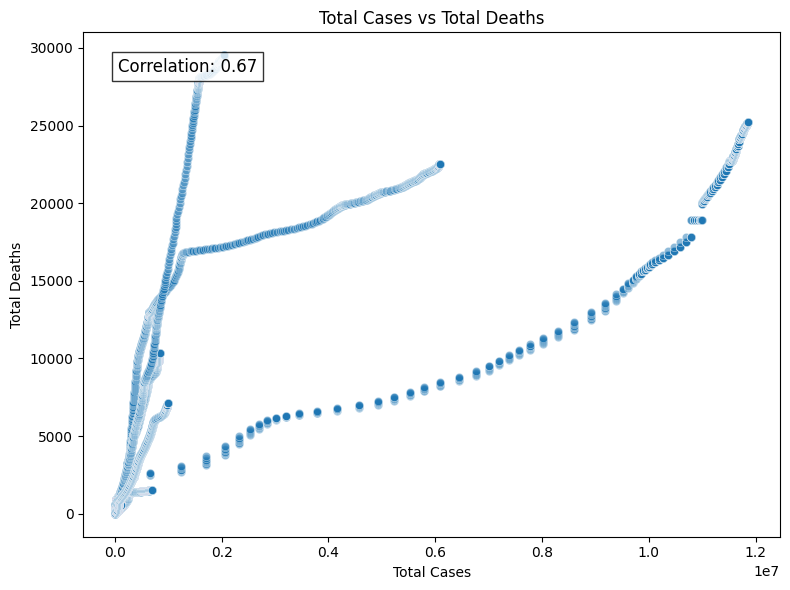

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr = df_cleaned['total_cases'].corr(df_cleaned['total_deaths'])

# Scatter plot with correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='total_cases', y='total_deaths', alpha=0.5)
plt.title('Total Cases vs Total Deaths')

# Add correlation value as text
plt.gca().text(
    0.05, 0.95,
    f"Correlation: {corr:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


# **Box Plot: New Cases by Continent with Summary Stats**

Summary of 'new_cases' by Continent:
                count         mean           std  min  25%   50%      75%  \
continent                                                                   
Asia           6090.0   588.730706   1559.566789  0.0  0.0  28.0   422.50   
Europe         3934.0  1798.984240   5083.733505  0.0  0.0  26.5  1542.75   
North America  4068.0    36.394789    109.567527  0.0  0.0   0.0    16.00   
Oceania        1961.0  6046.439572  38431.507402  0.0  0.0   0.0     8.00   

                    max  
continent                
Asia            16230.0  
Europe          63507.0  
North America    1846.0  
Oceania        588813.0  


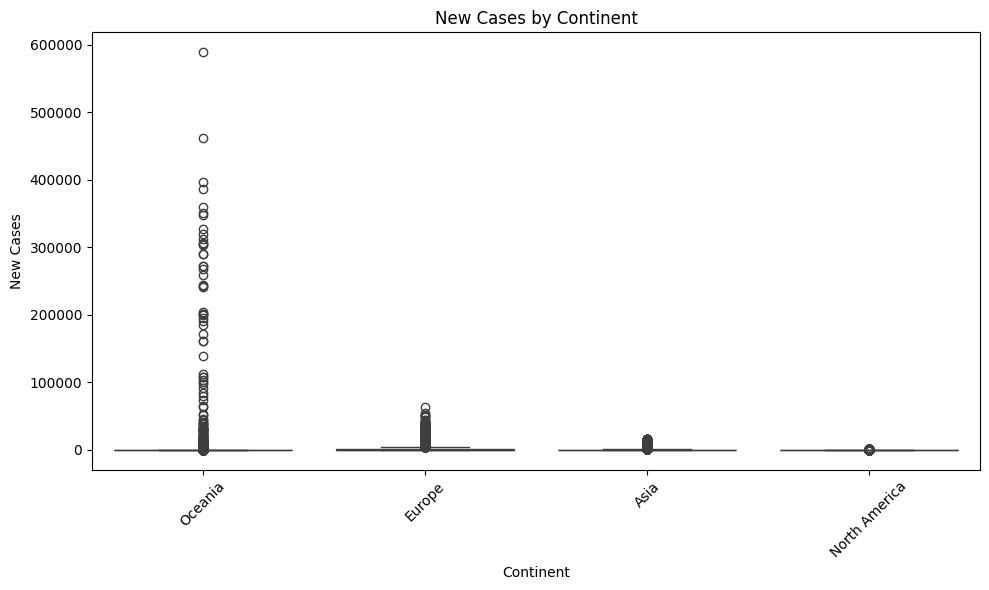

In [7]:
# Calculate group-wise stats
continent_stats = df_cleaned.groupby('continent')['new_cases'].describe()

# Display boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='continent', y='new_cases')
plt.xticks(rotation=45)
plt.title('New Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('New Cases')

# Optional: print the group-wise summary to console
print("Summary of 'new_cases' by Continent:")
print(continent_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

plt.tight_layout()
plt.show()


#**MULTIVARIATE ANALYSIS**

# **Multivariate Correlation Heatmap**

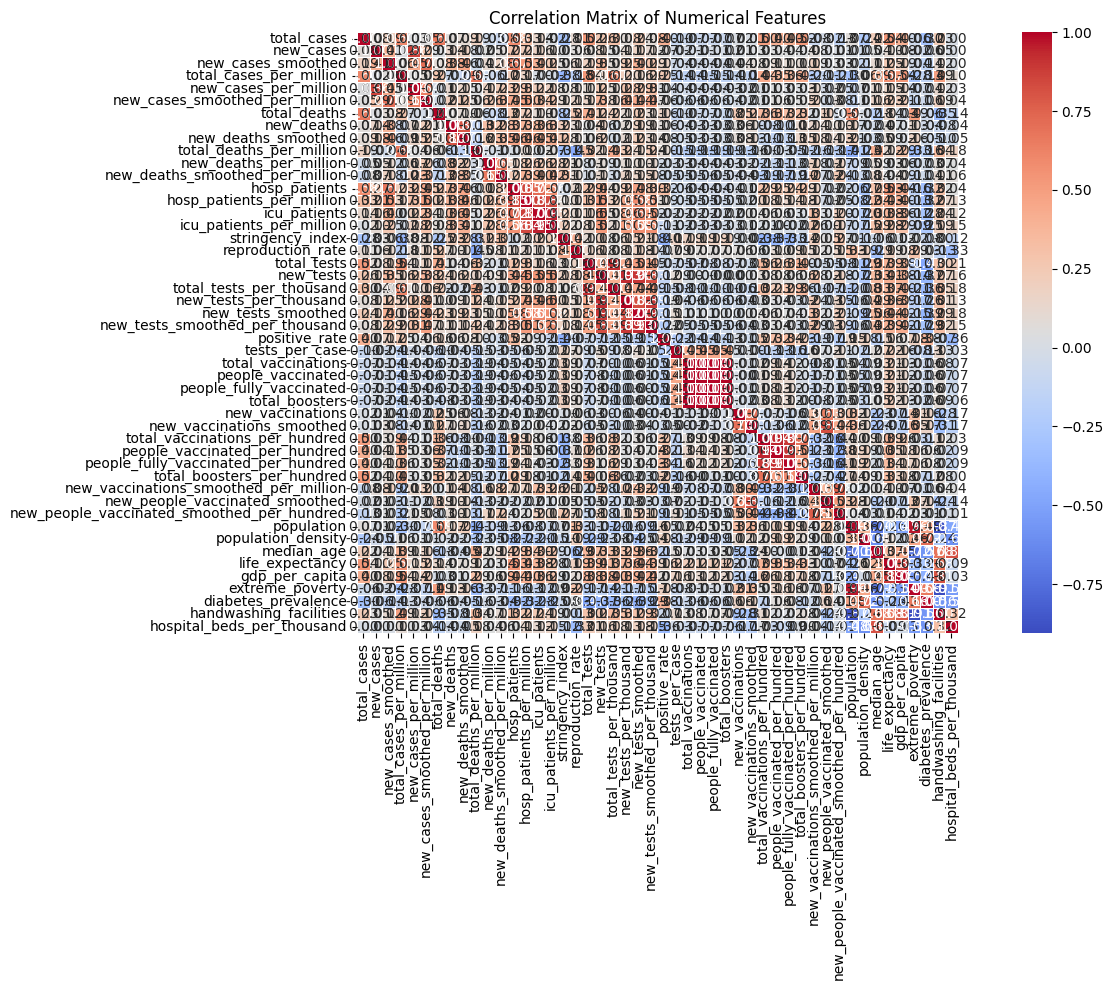

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot full heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


# **Extract & Display Top Correlated Pairs**

In [9]:
# Unstack and sort correlation pairs (remove self-correlation)
corr_pairs = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicates (e.g., (a,b) and (b,a))
seen = set()
unique_pairs = []
for i in range(0, len(corr_pairs), 2):
    pair = corr_pairs.index[i]
    if pair not in seen and (pair[1], pair[0]) not in seen:
        seen.add(pair)
        unique_pairs.append((pair[0], pair[1], corr_pairs[pair]))

# Create DataFrame
top_corr_df = pd.DataFrame(unique_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
top_corr_df = top_corr_df.iloc[:10]  # Top 10 pairs

# Display table
print("Top 10 Correlated Feature Pairs:")
print(top_corr_df)


Top 10 Correlated Feature Pairs:
                        Feature 1                      Feature 2  Correlation
0              total_vaccinations              people_vaccinated     0.999964
1              total_vaccinations        people_fully_vaccinated     0.999789
2         people_fully_vaccinated              people_vaccinated     0.999787
3                  total_boosters        people_fully_vaccinated     0.998611
4                  total_boosters             total_vaccinations     0.998551
5               people_vaccinated                 total_boosters     0.998361
6                 extreme_poverty                     population     0.963704
7        icu_patients_per_million                   icu_patients     0.952964
8  total_vaccinations_per_hundred  people_vaccinated_per_hundred     0.941216
9                       new_tests         new_tests_per_thousand     0.927077


# **OUTLIER DETECTION**

Number of outliers in 'total_cases': 2472
Outliers as percentage of total: 15.40%


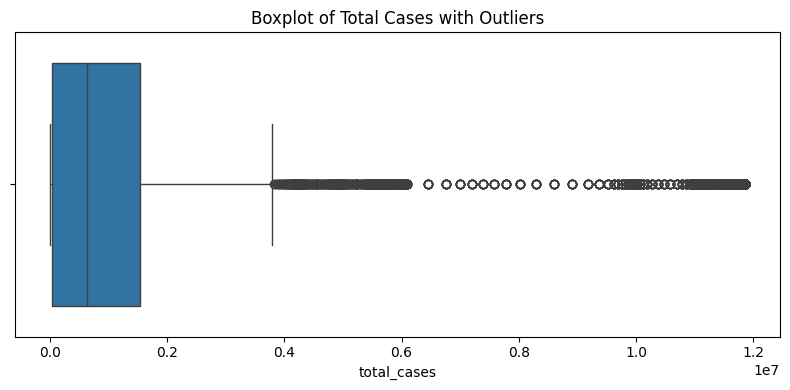

In [10]:
# Calculate outliers
Q1 = df_cleaned['total_cases'].quantile(0.25)
Q3 = df_cleaned['total_cases'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['total_cases'] < Q1 - 1.5 * IQR) |
                      (df_cleaned['total_cases'] > Q3 + 1.5 * IQR)]

# Print summary
print(f"Number of outliers in 'total_cases': {len(outliers)}")
print(f"Outliers as percentage of total: {100 * len(outliers)/len(df_cleaned):.2f}%")

# Visualize with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['total_cases'])
plt.title('Boxplot of Total Cases with Outliers')
plt.tight_layout()
plt.show()


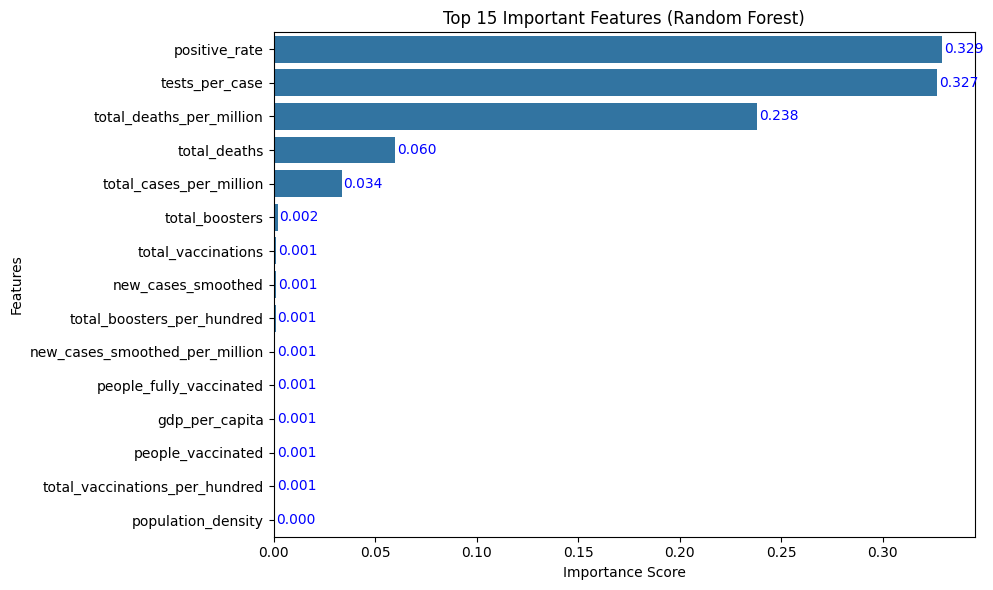

In [11]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Work on numeric data
df_rf = df_cleaned.select_dtypes(include='number')

# Fill missing numeric values with median (safer than mean for skewed data)
df_rf = df_rf.fillna(df_rf.median())

# Use a sample for faster execution
df_rf_sample = df_rf.sample(n=5000, random_state=42)  # sample 5000 rows

# Define features and target
X = df_rf_sample.drop(columns=['total_cases'])
y = df_rf_sample['total_cases']

# Train Random Forest with optimized settings for speed
model = RandomForestRegressor(
    n_estimators=50,    # fewer trees
    max_depth=10,       # limit depth
    random_state=42,
    n_jobs=-1           # use all CPU cores
)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Top N features
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:top_n], y=feature_importance.index[:top_n])
plt.title(f'Top {top_n} Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add values to bars
for i, v in enumerate(feature_importance[:top_n]):
    plt.text(v + 0.001, i, f"{v:.3f}", color='blue', va='center')

plt.tight_layout()
plt.show()


# **REGRESSION MODEL**
# **Models: Linear, SVM, Decision Tree (DT), Random Forest (RF), AdaBoost (AB), Artificial Neural Network (ANN)**

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv("DATA COVID 19.csv")

# Basic info
print(df.info())

# Check missing values
print(df.isnull().sum())

# Quick peek
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85196 entries, 0 to 85195
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     85196 non-null  object 
 1   date                                        85196 non-null  object 
 2   total_cases                                 84870 non-null  float64
 3   new_cases                                   84863 non-null  float64
 4   new_cases_smoothed                          84660 non-null  float64
 5   total_cases_per_million                     84870 non-null  float64
 6   new_cases_per_million                       84863 non-null  float64
 7   new_cases_smoothed_per_million              84660 non-null  float64
 8   total_deaths                                84870 non-null  float64
 9   new_deaths                                  84864 non-null  float64
 10  new_deaths

In [13]:
# Drop columns with too many missing values (optional)
df = df.dropna(axis=1, thresh=len(df)*0.6)

# Fill missing numeric values with mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])


In [15]:
# =========================
# COVID-19: Setup & Preprocessing
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# -------- Load data --------
df = pd.read_csv("DATA COVID 19.csv")

# (Optional) parse date, if present
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# -------- Minimal cleaning --------
# Drop columns with >95% missing
too_missing = df.columns[df.isna().mean() > 0.95]
df = df.drop(columns=too_missing)

# If total_cases exists, fill remaining missing target-friendly defaults
if 'total_cases' in df.columns:
    df['total_cases'] = df['total_cases'].fillna(0)

# Cap very large values for stability (optional; tweak thresholds as you like)
for c in [c for c in df.columns if c.startswith(('total_', 'new_'))]:
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):
        df[c] = np.clip(df[c], a_min=0, a_max=df[c].quantile(0.999))

# -------- Helpers to build preprocessors --------
def make_preprocessor(X_df, scale_numeric=True):
    cat_cols = X_df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X_df.select_dtypes(include=[np.number, 'float64', 'int64']).columns.tolist()

    num_steps = [('imputer', SimpleImputer(strategy='median'))]
    if scale_numeric:
        num_steps.append(('scaler', StandardScaler()))

    pre = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=num_steps), num_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), cat_cols)
        ],
        remainder='drop'
    )
    return pre


In [22]:
from sklearn.model_selection import train_test_split

# Example target: predicting 'total_deaths' (you can change this)
X = df_cleaned.drop(columns=['total_deaths'])
y = df_cleaned['total_deaths']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.model_selection import train_test_split

# Example target: predicting 'total_deaths' (you can change this)
X = df_cleaned.drop(columns=['total_deaths'])
y = df_cleaned['total_deaths']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/DATA COVID 19.csv")

# Show first rows and columns
print(df.head())
print(df.columns)


       country      date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  1/1/2020          NaN        NaN                 NaN   
1  Afghanistan  1/2/2020          NaN        NaN                 NaN   
2  Afghanistan  1/3/2020          NaN        NaN                 NaN   
3  Afghanistan  1/4/2020          0.0        0.0                 NaN   
4  Afghanistan  1/5/2020          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      0.0                    0.0   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578801.0   
1                             NaN           NaN         NaN  ...  40578801.0   
2       

In [28]:
df_info = df.info()
df_nulls = df.isnull().sum()

df_info, df_nulls.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294741 entries, 0 to 294740
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     294741 non-null  object 
 1   date                                        294741 non-null  object 
 2   total_cases                                 287663 non-null  float64
 3   new_cases                                   286132 non-null  float64
 4   new_cases_smoothed                          285449 non-null  float64
 5   total_cases_per_million                     287663 non-null  float64
 6   new_cases_per_million                       286132 non-null  float64
 7   new_cases_smoothed_per_million              285449 non-null  float64
 8   total_deaths                                287663 non-null  float64
 9   new_deaths                                  286151 non-null  float64
 

(None,
 country                                         0
 date                                            0
 total_cases                                  7078
 new_cases                                    8609
 new_cases_smoothed                           9292
 total_cases_per_million                      7078
 new_cases_per_million                        8609
 new_cases_smoothed_per_million               9292
 total_deaths                                 7078
 new_deaths                                   8590
 new_deaths_smoothed                          9283
 total_deaths_per_million                     7078
 new_deaths_per_million                       8590
 new_deaths_smoothed_per_million              9283
 excess_mortality                           286249
 excess_mortality_cumulative                286249
 excess_mortality_cumulative_absolute       286249
 excess_mortality_cumulative_per_million    286249
 hosp_patients                              272511
 hosp_patients_per_milli

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Path to the uploaded file in Colab (update if different)
DATA_PATH = "/content/DATA COVID 19.csv"    # Use "/mnt/data/DATA COVID 19.csv" if running locally in same environment


In [31]:
df = pd.read_csv(DATA_PATH)
print("Rows:", len(df))
print("Columns:", len(df.columns))
print(df.columns.tolist()[:40])   # show first 40 columns
display(df.head())
display(df.info())


Rows: 294741
Columns: 61
['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,1/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294741 entries, 0 to 294740
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     294741 non-null  object 
 1   date                                        294741 non-null  object 
 2   total_cases                                 287663 non-null  float64
 3   new_cases                                   286132 non-null  float64
 4   new_cases_smoothed                          285449 non-null  float64
 5   total_cases_per_million                     287663 non-null  float64
 6   new_cases_per_million                       286132 non-null  float64
 7   new_cases_smoothed_per_million              285449 non-null  float64
 8   total_deaths                                287663 non-null  float64
 9   new_deaths                                  286151 non-null  float64
 

None

In [32]:
# --- Choose target ---
TARGET = 'total_deaths'
if TARGET not in df.columns:
    raise ValueError(f"Target {TARGET} not in columns")

# --- Drop columns unlikely to help or too high-cardinality for quick models ---
drop_cols = ['country', 'code', 'date']   # drop country to avoid massive one-hot; keep continent
df2 = df.drop(columns=[c for c in drop_cols if c in df.columns])

# --- Drop columns with extremely high missing ratio (>70%) to reduce noise ---
miss_ratio = df2.isna().mean()
drop_high_nan = miss_ratio[miss_ratio > 0.70].index.tolist()
df2 = df2.drop(columns=drop_high_nan)
print("Dropped columns with >70% NaN:", drop_high_nan)

# --- Keep only useful columns (numeric + a few categoricals like 'continent') ---
# List categorical columns we keep
cat_cols = [c for c in df2.select_dtypes(include=['object']).columns if c in ['continent']]
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET]  # exclude target from features

print("Numeric features:", len(num_cols))
print("Categorical features:", cat_cols)

# --- Fill target NaNs (drop rows without target) ---
df2 = df2[df2[TARGET].notna()].copy()

# --- Optional sampling to speed up training ---
sample_n = 50000
if len(df2) > sample_n:
    df_sample = df2.sample(n=sample_n, random_state=42).reset_index(drop=True)
else:
    df_sample = df2.copy().reset_index(drop=True)
print("Using sample rows:", len(df_sample))

# --- Split X, y ---
X = df_sample[num_cols + cat_cols].copy()
y = df_sample[TARGET].astype(float).copy()

# --- Preprocessor: numeric impute+scale, categorical impute+one-hot ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


Dropped columns with >70% NaN: ['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'human_development_index']
Numeric features: 26
Categorical features: ['continent']
Using sample rows: 50000
X_train shape: (40000, 27) X_test shape: (10000, 27)


In [33]:
results_partA = {}

# Linear Regression
pipe_lr = Pipeline([('pre', preprocessor), ('model', LinearRegression())])
print("Training Linear Regression...")
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
results_partA['Linear'] = {'MSE': mean_squared_error(y_test, pred_lr), 'R2': r2_score(y_test, pred_lr)}

# Decision Tree
pipe_dt = Pipeline([('pre', preprocessor), ('model', DecisionTreeRegressor(random_state=42, max_depth=12))])
print("Training Decision Tree...")
pipe_dt.fit(X_train, y_train)
pred_dt = pipe_dt.predict(X_test)
results_partA['DecisionTree'] = {'MSE': mean_squared_error(y_test, pred_dt), 'R2': r2_score(y_test, pred_dt)}

# Display results
import pandas as pd
df_resA = pd.DataFrame(results_partA).T
print(df_resA)


Training Linear Regression...
Training Decision Tree...
                       MSE        R2
Linear        6.568568e+09  0.944978
DecisionTree  1.898837e+07  0.999841


In [34]:
results_partB = {}

# Random Forest (use n_jobs=-1 to parallelize)
pipe_rf = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42))])
print("Training Random Forest... (may take a while)")
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
results_partB['RandomForest'] = {'MSE': mean_squared_error(y_test, pred_rf), 'R2': r2_score(y_test, pred_rf)}

# Gradient Boosting
pipe_gb = Pipeline([('pre', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
print("Training Gradient Boosting...")
pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_test)
results_partB['GradientBoosting'] = {'MSE': mean_squared_error(y_test, pred_gb), 'R2': r2_score(y_test, pred_gb)}

# AdaBoost
pipe_ab = Pipeline([('pre', preprocessor), ('model', AdaBoostRegressor(n_estimators=100, random_state=42))])
print("Training AdaBoost...")
pipe_ab.fit(X_train, y_train)
pred_ab = pipe_ab.predict(X_test)
results_partB['AdaBoost'] = {'MSE': mean_squared_error(y_test, pred_ab), 'R2': r2_score(y_test, pred_ab)}

df_resB = pd.DataFrame(results_partB).T
print(df_resB)


Training Random Forest... (may take a while)
Training Gradient Boosting...
Training AdaBoost...
                           MSE        R2
RandomForest      1.716356e+07  0.999856
GradientBoosting  1.186874e+08  0.999006
AdaBoost          6.840813e+09  0.942698


In [35]:
results_partC = {}

# Support Vector Regressor (try on smaller sample if too slow)
print("Training SVR (may be very slow). Consider smaller sample or skip if too slow.")
pipe_svr = Pipeline([('pre', preprocessor), ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))])
# you may want to train on smaller subset:
# pipe_svr.fit(X_train.sample(2000, random_state=1), y_train.sample(2000, random_state=1))
pipe_svr.fit(X_train, y_train)
pred_svr = pipe_svr.predict(X_test)
results_partC['SVR'] = {'MSE': mean_squared_error(y_test, pred_svr), 'R2': r2_score(y_test, pred_svr)}

# ANN (MLPRegressor)
print("Training ANN (MLPRegressor)...")
pipe_ann = Pipeline([('pre', preprocessor), ('model', MLPRegressor(hidden_layer_sizes=(128,64), max_iter=300, random_state=42))])
pipe_ann.fit(X_train, y_train)
pred_ann = pipe_ann.predict(X_test)
results_partC['ANN'] = {'MSE': mean_squared_error(y_test, pred_ann), 'R2': r2_score(y_test, pred_ann)}

df_resC = pd.DataFrame(results_partC).T
print(df_resC)


Training SVR (may be very slow). Consider smaller sample or skip if too slow.
Training ANN (MLPRegressor)...
              MSE        R2
SVR  1.256539e+11 -0.052545
ANN  1.734014e+08  0.998547


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              Model           MSE        R2
2      RandomForest  1.716356e+07  0.999856
1      DecisionTree  1.898837e+07  0.999841
3  GradientBoosting  1.186874e+08  0.999006
6               ANN  1.734014e+08  0.998547
0            Linear  6.568568e+09  0.944978
4          AdaBoost  6.840813e+09  0.942698
5               SVR  1.256539e+11 -0.052545


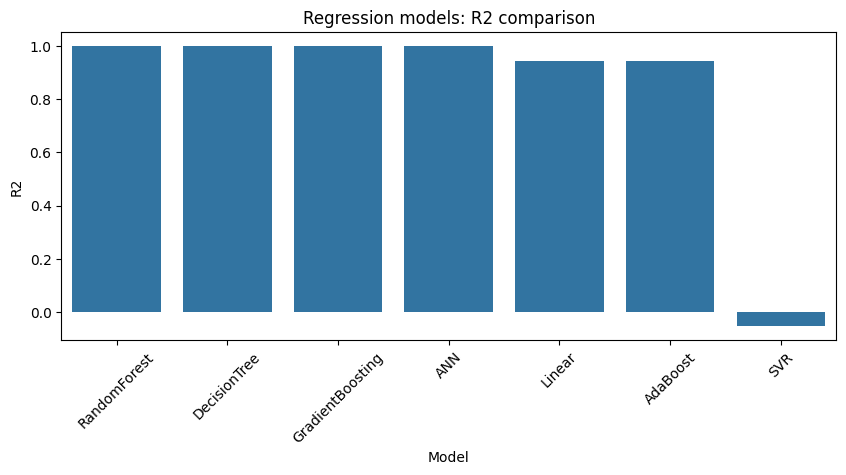

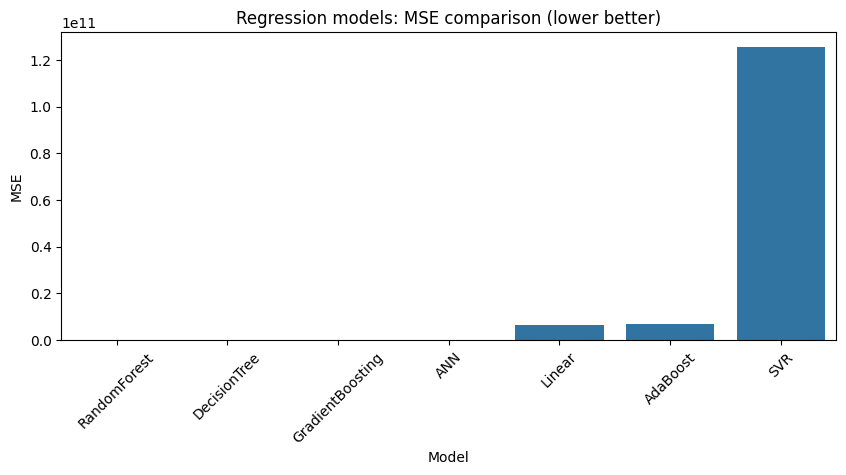

In [36]:
# Combine result DataFrames (if available)
res_all = []
for df_r in [locals().get('df_resA'), locals().get('df_resB'), locals().get('df_resC')]:
    if df_r is not None:
        res_all.append(df_r)
if res_all:
    res_combo = pd.concat(res_all)
    res_combo = res_combo.reset_index().rename(columns={'index':'Model'})
    print(res_combo.sort_values('R2', ascending=False))
    plt.figure(figsize=(10,4))
    sns.barplot(data=res_combo.sort_values('R2', ascending=False), x='Model', y='R2')
    plt.xticks(rotation=45)
    plt.title('Regression models: R2 comparison')
    plt.show()

    plt.figure(figsize=(10,4))
    sns.barplot(data=res_combo.sort_values('MSE'), x='Model', y='MSE')
    plt.xticks(rotation=45)
    plt.title('Regression models: MSE comparison (lower better)')
    plt.show()
else:
    print("No result DataFrames found. Run parts A/B/C first.")
